In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
# --- 1. Tải bộ dữ liệu Iris có sẵn ---
iris = load_iris()
X_temp = iris.data
y_temp = iris.target

print(f"Tổng số mẫu dữ liệu ban đầu: {len(X_temp)}")
print(f"Số lượng đặc trưng ban đầu: {X_temp.shape[1]}")
print(f"Các lớp (loài hoa) ban đầu: {iris.target_names}")

df = pd.DataFrame(data=X_temp, columns=iris.feature_names)
df["species"] = iris.target_names[y_temp]

print("Số lượng các hàng lặp lại: ")
print(df[:].value_counts())

# Xoá hàng trùng lặp
print("Xoá các hàng trùng lặp...")
df.drop_duplicates(inplace=True)

print("Số lượng cột bị thiếu dữ liệu:")
print(df.isnull().sum())

print("Thông tin về dữ liệu:")
df.info()

# Tách dữ liệu thành X và y
X = df.iloc[:, :-1].values  # Tất cả các cột ngoại trừ cột cuối cùng
y = df.iloc[:, -1].values   # Chỉ cột cuối cùng

print(f"Tổng số mẫu dữ liệu sau khi làm sạch: {len(X)}")
print(f"Số lượng đặc trưng sau khi làm sạch: {X.shape[1]}")
print(f"Các lớp (loài hoa) sau khi làm sạch: {iris.target_names}")
print("Cột y:", type(y))

Tổng số mẫu dữ liệu ban đầu: 150
Số lượng đặc trưng ban đầu: 4
Các lớp (loài hoa) ban đầu: ['setosa' 'versicolor' 'virginica']
Số lượng các hàng lặp lại: 
sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species   
5.8                2.7               5.1                1.9               virginica     2
6.2                2.2               4.5                1.5               versicolor    1
                   2.9               4.3                1.3               versicolor    1
                   3.4               5.4                2.3               virginica     1
6.3                2.3               4.4                1.3               versicolor    1
                                                                                       ..
5.4                3.9               1.3                0.4               setosa        1
                                     1.7                0.4               setosa        1
5.5                2.3               4.0

In [19]:
# --- 2. Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%) ---
# train_test_split là bước cơ bản và phổ biến nhất
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% dữ liệu sẽ được dùng để kiểm tra
    random_state=42,    # Đảm bảo kết quả chia luôn giống nhau mỗi lần chạy
    stratify=y          # Giữ tỷ lệ các loài hoa trong cả hai tập
)

print("--- Kích thước các tập dữ liệu ---")
print(f"Tập huấn luyện (Train): {len(X_train)} mẫu")
print(f"Tập kiểm tra (Test):    {len(X_test)} mẫu")


--- Kích thước các tập dữ liệu ---
Tập huấn luyện (Train): 119 mẫu
Tập kiểm tra (Test):    30 mẫu


In [28]:

# Tạo ra các lưới tham số riêng cho từng loại mô hình
param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.1, 1.0, 10],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None]
    }
}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)     
}

# --- 2. Lặp qua từng mô hình để chạy GridSearchCV ---

print("\n--- Bắt đầu tìm kiếm mô hình và siêu tham số tốt nhất ---")
best_models = {}

for name, model in models.items():
    print(f"\nĐang chạy GridSearchCV cho mô hình: {name}")
    
    # Lấy lưới tham số tương ứng với mô hình
    grid = param_grids[name]
    
    # Khởi tạo và chạy GridSearchCV cho mô hình hiện tại
    grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Lưu lại mô hình tốt nhất và điểm số
    best_models[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    
    print(f"Hoàn tất. Điểm accuracy tốt nhất: {grid_search.best_score_:.4f}")
    print(f"Cấu hình tốt nhất: {grid_search.best_params_}")

# --- 3. In ra kết quả cuối cùng ---
print("\n--- Huấn luyện hoàn tất! ---")
# Tìm ra mô hình có điểm số cao nhất trong tất cả
best_model_name = max(best_models, key=lambda name: best_models[name]['best_score'])
final_model = best_models[best_model_name]['best_estimator']
final_score = best_models[best_model_name]['best_score']

print(f"\n=> Mô hình tốt nhất chung cuộc là: '{best_model_name}'")
print(f"=> Với điểm accuracy trên tập huấn luyện (cross-validated) là: {final_score:.4f}")
print(f"=> Với cấu hình: {best_models[best_model_name]['best_params']}")


--- Bắt đầu tìm kiếm mô hình và siêu tham số tốt nhất ---

Đang chạy GridSearchCV cho mô hình: Decision Tree
Hoàn tất. Điểm accuracy tốt nhất: 0.9500
Cấu hình tốt nhất: {'max_depth': 3, 'min_samples_leaf': 1}

Đang chạy GridSearchCV cho mô hình: Logistic Regression
Hoàn tất. Điểm accuracy tốt nhất: 0.9583
Cấu hình tốt nhất: {'C': 10, 'solver': 'liblinear'}

Đang chạy GridSearchCV cho mô hình: Random Forest


/opt/miniconda3/envs/machine_learning/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/miniconda3/envs/machine_learning/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/miniconda3/envs/machine_learning/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error w

Hoàn tất. Điểm accuracy tốt nhất: 0.9500
Cấu hình tốt nhất: {'max_depth': 5, 'n_estimators': 50}

--- Huấn luyện hoàn tất! ---

=> Mô hình tốt nhất chung cuộc là: 'Logistic Regression'
=> Với điểm accuracy trên tập huấn luyện (cross-validated) là: 0.9583
=> Với cấu hình: {'C': 10, 'solver': 'liblinear'}


In [29]:
# --- PHƯƠNG PHÁP KIỂM TRA CHÉO CHI TIẾT ---
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

print("\n=== KIỂM TRA CHÉO CHI TIẾT CHO CÁC MÔ HÌNH ===")

# Thiết lập phương pháp kiểm tra chéo
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lưu trữ kết quả cross-validation cho từng mô hình
cv_results = {}
cv_scores_all = {}

print("\n--- Thực hiện kiểm tra chéo 10-fold cho từng mô hình ---")

for name, model_info in best_models.items():
    print(f"\nKiểm tra chéo cho {name}...")
    
    # Lấy mô hình tốt nhất đã được tối ưu
    best_model = model_info['best_estimator']
    
    # Thực hiện cross-validation với 10 folds
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
    
    # Lưu trữ kết quả
    cv_scores_all[name] = cv_scores
    cv_results[name] = {
        'mean_score': cv_scores.mean(),
        'std_score': cv_scores.std(),
        'min_score': cv_scores.min(),
        'max_score': cv_scores.max(),
        'all_scores': cv_scores
    }
    
    print(f"  ✓ Điểm trung bình: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"  ✓ Khoảng điểm: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")

# Tìm mô hình tốt nhất dựa trên cross-validation
best_cv_model = max(cv_results, key=lambda x: cv_results[x]['mean_score'])
print(f"\n🏆 MÔ HÌNH TỐT NHẤT THEO KIỂM TRA CHÉO: {best_cv_model}")
print(f"   Điểm trung bình: {cv_results[best_cv_model]['mean_score']:.4f}")
print(f"   Độ lệch chuẩn: ±{cv_results[best_cv_model]['std_score']:.4f}")


=== KIỂM TRA CHÉO CHI TIẾT CHO CÁC MÔ HÌNH ===

--- Thực hiện kiểm tra chéo 10-fold cho từng mô hình ---

Kiểm tra chéo cho Decision Tree...
  ✓ Điểm trung bình: 0.9576 (±0.0565)
  ✓ Khoảng điểm: [0.8333, 1.0000]

Kiểm tra chéo cho Logistic Regression...
  ✓ Điểm trung bình: 0.9659 (±0.0560)
  ✓ Khoảng điểm: [0.8333, 1.0000]

Kiểm tra chéo cho Random Forest...


/opt/miniconda3/envs/machine_learning/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/miniconda3/envs/machine_learning/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/miniconda3/envs/machine_learning/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error w

  ✓ Điểm trung bình: 0.9485 (±0.0694)
  ✓ Khoảng điểm: [0.8182, 1.0000]

🏆 MÔ HÌNH TỐT NHẤT THEO KIỂM TRA CHÉO: Logistic Regression
   Điểm trung bình: 0.9659
   Độ lệch chuẩn: ±0.0560


/var/folders/m9/l1nj0nwj3d51rmrcjmj4v_400000gn/T/ipykernel_1224/2110336061.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_plot, labels=list(cv_scores_all.keys()))


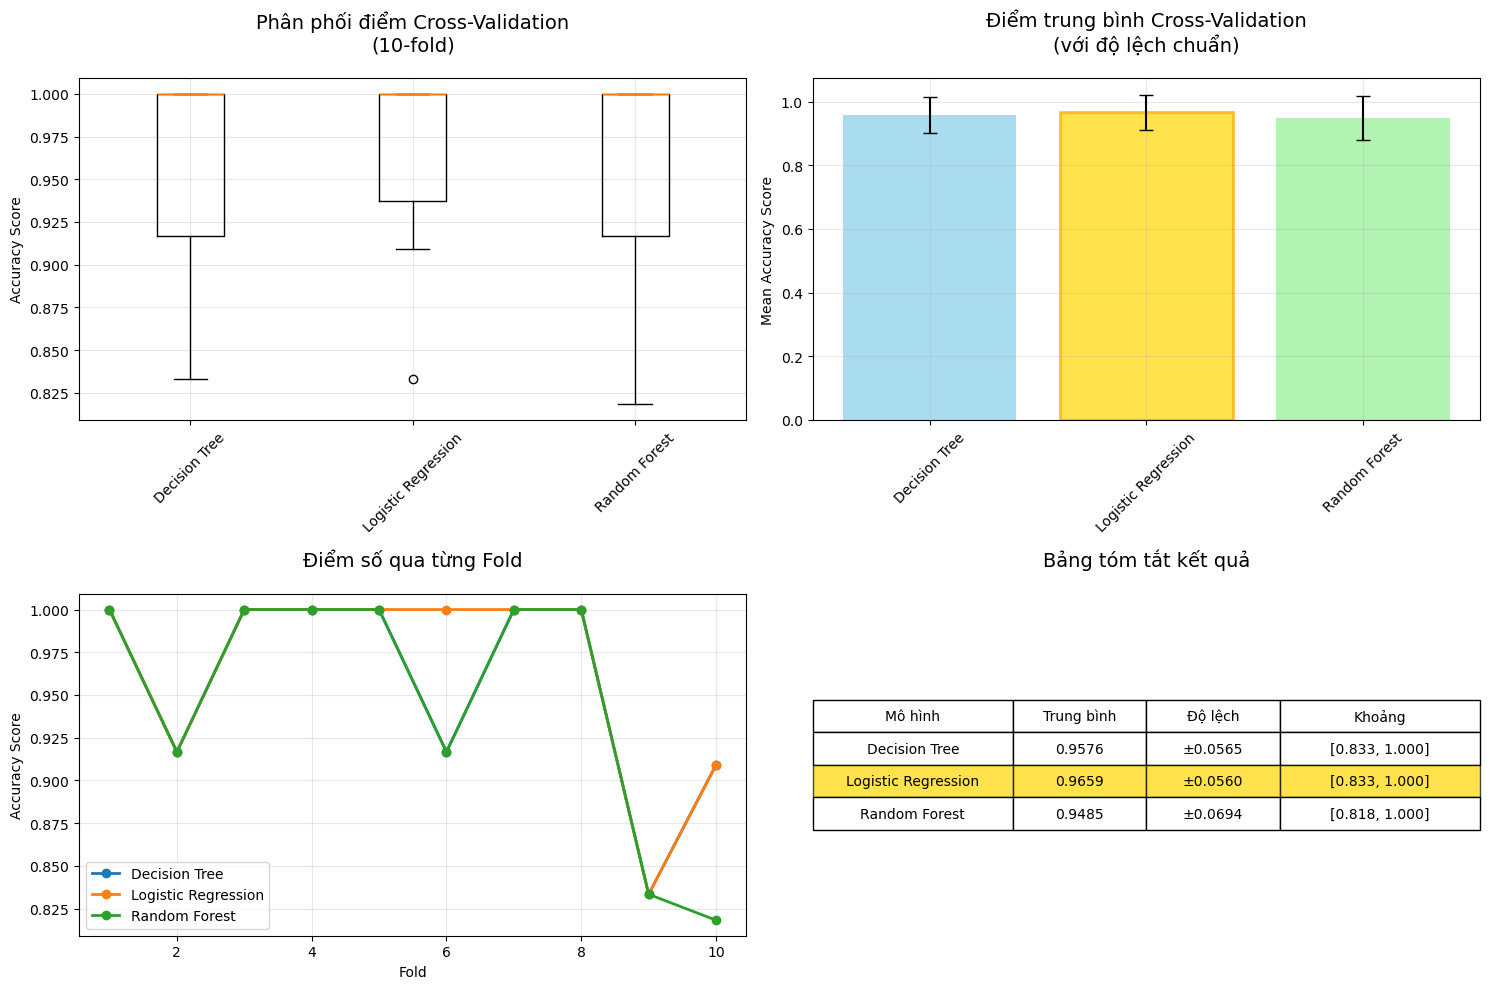

In [30]:
# --- TRỰC QUAN HÓA KẾT QUẢ KIỂM TRA CHÉO ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# 1. Boxplot so sánh phân phối điểm số
plt.subplot(2, 2, 1)
data_for_plot = [cv_scores_all[name] for name in cv_scores_all.keys()]
plt.boxplot(data_for_plot, labels=list(cv_scores_all.keys()))
plt.title('Phân phối điểm Cross-Validation\n(10-fold)', fontsize=14, pad=20)
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Bar chart so sánh điểm trung bình
plt.subplot(2, 2, 2)
models = list(cv_results.keys())
means = [cv_results[name]['mean_score'] for name in models]
stds = [cv_results[name]['std_score'] for name in models]

bars = plt.bar(models, means, yerr=stds, capsize=5, alpha=0.7, 
               color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Điểm trung bình Cross-Validation\n(với độ lệch chuẩn)', fontsize=14, pad=20)
plt.ylabel('Mean Accuracy Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Highlight mô hình tốt nhất
best_idx = models.index(best_cv_model)
bars[best_idx].set_color('gold')
bars[best_idx].set_edgecolor('orange')
bars[best_idx].set_linewidth(2)

# 3. Line plot cho từng fold
plt.subplot(2, 2, 3)
folds = range(1, 11)
for name in cv_scores_all.keys():
    plt.plot(folds, cv_scores_all[name], marker='o', label=name, linewidth=2)
plt.title('Điểm số qua từng Fold', fontsize=14, pad=20)
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Bảng tóm tắt
plt.subplot(2, 2, 4)
plt.axis('off')
table_data = []
for name in models:
    row = [
        name,
        f"{cv_results[name]['mean_score']:.4f}",
        f"±{cv_results[name]['std_score']:.4f}",
        f"[{cv_results[name]['min_score']:.3f}, {cv_results[name]['max_score']:.3f}]"
    ]
    table_data.append(row)

table = plt.table(cellText=table_data,
                  colLabels=['Mô hình', 'Trung bình', 'Độ lệch', 'Khoảng'],
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.3, 0.2, 0.2, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.title('Bảng tóm tắt kết quả', fontsize=14, pad=20)

# Highlight hàng của mô hình tốt nhất
best_row_idx = models.index(best_cv_model) + 1
for j in range(4):
    table[(best_row_idx, j)].set_facecolor('gold')
    table[(best_row_idx, j)].set_alpha(0.7)

plt.tight_layout()
plt.show()

In [31]:
# --- PHÂN TÍCH THỐNG KÊ CHI TIẾT ---
from scipy import stats
import pandas as pd

print("\n=== PHÂN TÍCH THỐNG KÊ CHI TIẾT ===")

# Tạo DataFrame để dễ phân tích
df_cv_results = pd.DataFrame(cv_scores_all)
print("\n1. THỐNG KÊ MÔ TẢ:")
print(df_cv_results.describe())

print("\n2. KIỂM ĐỊNH THỐNG KÊ (Paired t-test):")
print("So sánh từng cặp mô hình để xem có khác biệt có ý nghĩa thống kê không:")

model_names = list(cv_scores_all.keys())
for i in range(len(model_names)):
    for j in range(i+1, len(model_names)):
        model1, model2 = model_names[i], model_names[j]
        scores1, scores2 = cv_scores_all[model1], cv_scores_all[model2]
        
        # Paired t-test
        t_stat, p_value = stats.ttest_rel(scores1, scores2)
        
        print(f"\n{model1} vs {model2}:")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            winner = model1 if t_stat > 0 else model2
            print(f"  🔍 Có khác biệt có ý nghĩa (p < 0.05) - {winner} tốt hơn")
        else:
            print(f"  ⚖️  Không có khác biệt có ý nghĩa thống kê (p ≥ 0.05)")

print(f"\n3. KIỂM ĐỊNH NORMALITAS (Shapiro-Wilk):")
for name, scores in cv_scores_all.items():
    stat, p_val = stats.shapiro(scores)
    distribution = "phân phối chuẩn" if p_val > 0.05 else "không phân phối chuẩn"
    print(f"{name}: W={stat:.4f}, p={p_val:.4f} - {distribution}")

print(f"\n4. HỆ SỐ BIẾN THIÊN (Coefficient of Variation):")
for name in cv_results.keys():
    mean_score = cv_results[name]['mean_score']
    std_score = cv_results[name]['std_score']
    cv_coeff = (std_score / mean_score) * 100
    stability = "rất ổn định" if cv_coeff < 2 else "ổn định" if cv_coeff < 5 else "không ổn định"
    print(f"{name}: CV = {cv_coeff:.2f}% - {stability}")


=== PHÂN TÍCH THỐNG KÊ CHI TIẾT ===

1. THỐNG KÊ MÔ TẢ:
       Decision Tree  Logistic Regression  Random Forest
count      10.000000            10.000000      10.000000
mean        0.957576             0.965909       0.948485
std         0.059566             0.059034       0.073171
min         0.833333             0.833333       0.818182
25%         0.916667             0.937500       0.916667
50%         1.000000             1.000000       1.000000
75%         1.000000             1.000000       1.000000
max         1.000000             1.000000       1.000000

2. KIỂM ĐỊNH THỐNG KÊ (Paired t-test):
So sánh từng cặp mô hình để xem có khác biệt có ý nghĩa thống kê không:

Decision Tree vs Logistic Regression:
  t-statistic: -1.0000
  p-value: 0.3434
  ⚖️  Không có khác biệt có ý nghĩa thống kê (p ≥ 0.05)

Decision Tree vs Random Forest:
  t-statistic: 1.0000
  p-value: 0.3434
  ⚖️  Không có khác biệt có ý nghĩa thống kê (p ≥ 0.05)

Logistic Regression vs Random Forest:
  t-statistic:

In [32]:
# --- KẾT LUẬN VÀ LỰA CHỌN MÔ HÌNH CUỐI CÙNG ---
from sklearn.metrics import classification_report, confusion_matrix

print("="*60)
print("                    KẾT LUẬN CUỐI CÙNG")
print("="*60)

# Lựa chọn mô hình dựa trên kết quả cross-validation
final_best_model = best_models[best_cv_model]['best_estimator']

print(f"\n🏆 MÔ HÌNH ĐƯỢC LỰA CHỌN: {best_cv_model}")
print(f"   Cấu hình tối ưu: {best_models[best_cv_model]['best_params']}")
print(f"   Điểm GridSearchCV: {best_models[best_cv_model]['best_score']:.4f}")
print(f"   Điểm Cross-Validation (10-fold): {cv_results[best_cv_model]['mean_score']:.4f} ± {cv_results[best_cv_model]['std_score']:.4f}")

# Đánh giá trên tập test
print(f"\n📊 ĐÁNH GIÁ TRÊN TẬP TEST:")
y_pred_final = final_best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_final)

print(f"   Accuracy trên tập test: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification report chi tiết
print(f"\n📋 BÁO CÁO PHÂN LOẠI CHI TIẾT:")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
print(f"\n🔢 MA TRẬN CONFUSION:")
cm = confusion_matrix(y_test, y_pred_final)
print(cm)

print(f"\n💡 NHẬN XÉT:")
print(f"1. Mô hình {best_cv_model} cho kết quả tốt nhất với độ chính xác {test_accuracy*100:.2f}% trên tập test")
print(f"2. Cross-validation cho thấy mô hình ổn định với độ lệch chuẩn {cv_results[best_cv_model]['std_score']:.4f}")

# So sánh với các mô hình khác
print(f"\n📈 SO SÁNH VỚI CÁC MÔ HÌNH KHÁC:")
for name in cv_results.keys():
    if name != best_cv_model:
        diff = cv_results[best_cv_model]['mean_score'] - cv_results[name]['mean_score']
        print(f"   {best_cv_model} tốt hơn {name}: +{diff:.4f} điểm ({diff*100:.2f}%)")

print(f"\n✅ KHUYẾN NGHỊ:")
if cv_results[best_cv_model]['std_score'] < 0.06:
    stability = "rất ổn định"
elif cv_results[best_cv_model]['std_score'] < 0.08:
    stability = "ổn định"
else:
    stability = "kém ổn định"

print(f"   Sử dụng {best_cv_model} cho bài toán này vì:")
print(f"   - Có độ chính xác cao nhất: {cv_results[best_cv_model]['mean_score']:.4f}")
print(f"   - Hiệu suất {stability} qua các fold")
print(f"   - Phù hợp với bộ dữ liệu Iris (kích thước nhỏ, đặc trưng ít)")

print("="*60)

                    KẾT LUẬN CUỐI CÙNG

🏆 MÔ HÌNH ĐƯỢC LỰA CHỌN: Logistic Regression
   Cấu hình tối ưu: {'C': 10, 'solver': 'liblinear'}
   Điểm GridSearchCV: 0.9583
   Điểm Cross-Validation (10-fold): 0.9659 ± 0.0560

📊 ĐÁNH GIÁ TRÊN TẬP TEST:
   Accuracy trên tập test: 0.9667 (96.67%)

📋 BÁO CÁO PHÂN LOẠI CHI TIẾT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


🔢 MA TRẬN CONFUSION:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

💡 NHẬN XÉT:
1. Mô hình Logistic Regression cho kết quả tốt nhất với độ chính xác 96.67% trên tập test
2. Cross-validation cho thấy mô hình ổn định với độ lệch chuẩn 0.0560

📈 SO SÁNH VỚI CÁC MÔ HÌNH KHÁC:
   Logistic Regression tốt hơn Dec

In [24]:
# --- 4. Đánh giá mô hình trên tập KIỂM TRA ---
print("\n--- Đánh giá mô hình ---")
# Yêu cầu mô hình dự đoán trên dữ liệu nó chưa từng thấy
y_pred = final_model.predict(X_test)
# So sánh dự đoán với kết quả thật để tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)

print(f"Độ chính xác trên tập kiểm tra: {accuracy * 100:.2f}%")


--- Đánh giá mô hình ---
Độ chính xác trên tập kiểm tra: 96.67%


In [25]:
# --- 5. Thử dự đoán một bông hoa mới ---
# Đặc trưng: [chiều dài đài, rộng đài, dài cánh, rộng cánh]
# Đây là đặc trưng của loài 'virginica'
new_flower = [[5.9, 3.0, 5.1, 1.8]] 

# Lấy kết quả dự đoán (lấy phần tử đầu tiên vì chỉ có 1 dự đoán)
prediction_index = final_model.predict(new_flower)[0]
print("Typele of prediction_index:", type(prediction_index))

print(f"\nDự đoán cho bông hoa mới: Loài '{prediction_index}'")

Typele of prediction_index: <class 'str'>

Dự đoán cho bông hoa mới: Loài 'virginica'
